In [1]:
library(dplyr)
library(Seurat)
library(patchwork)


载入程辑包：‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject



In [3]:
data <- Read10X(data.dir = "../../data/SC3pv3_GEX_Human_PBMC_filtered_feature_bc/filtered_feature_bc_matrix")

In [4]:
pbmc <- CreateSeuratObject(counts = data, project = "cso")

In [5]:
pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 10000)

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”


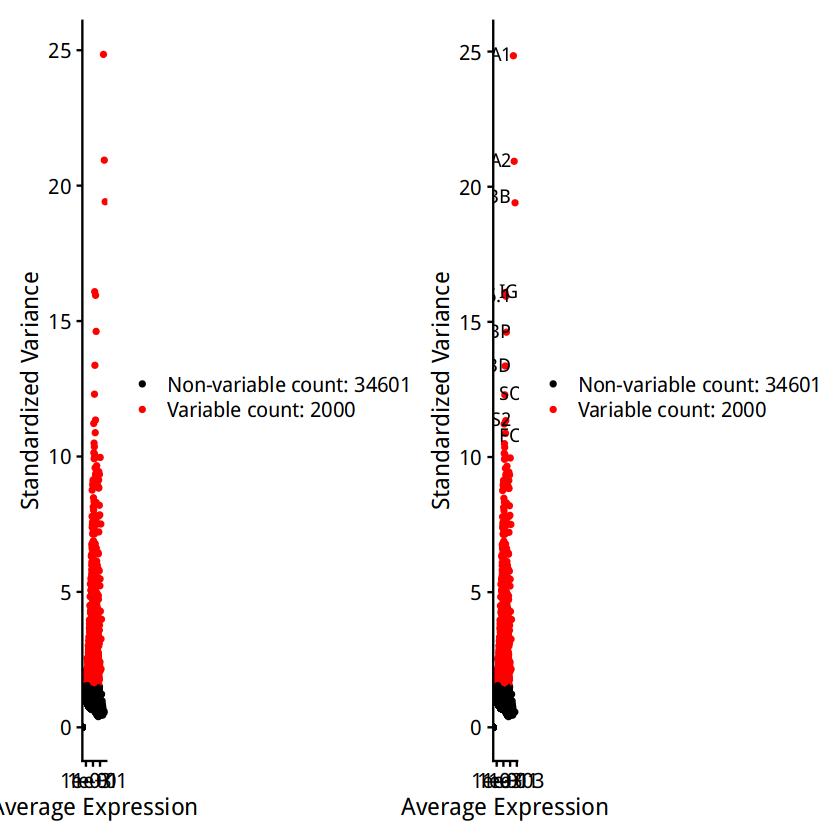

In [7]:
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(pbmc), 10)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(pbmc)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot1 + plot2

In [8]:
all.genes <- rownames(pbmc)
pbmc <- ScaleData(pbmc, features = all.genes)

Centering and scaling data matrix



In [9]:
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))

PC_ 1 
Positive:  CD247, IL32, IL7R, RORA, CAMK4, INPP4B, BCL2, ANK3, LEF1, TRBC1 
	   THEMIS, BACH2, MLLT3, RNF125, RASGRF2, NR3C2, NELL2, LINC01934, CTSW, TAFA1 
	   SAMD3, TSHZ2, PDE3B, CCL5, PCAT1, MYBL1, GLCCI1, CSGALNACT1, KLRK1, NCALD 
Negative:  LYZ, FCN1, IRAK3, SLC8A1, IFI30, CLEC7A, PLXDC2, SPI1, CYBB, S100A9 
	   FGL2, LRMDA, CTSS, MNDA, FAM49A, NCF2, RBM47, TYMP, MCTP1, VCAN 
	   HCK, CSF3R, WDFY3, CST3, LST1, MPEG1, SLC11A1, EVI5, PSAP, CSTA 
PC_ 2 
Positive:  CD247, S100A4, NKG7, CTSW, CST7, SYTL3, GZMA, MYO1F, PLCB1, SAMD3 
	   RNF125, RORA, NCALD, CCL5, MYBL1, KLRD1, TGFBR3, IL32, PRF1, RAP1GAP2 
	   GNLY, SLCO3A1, HOPX, FGFBP2, YES1, S100A6, S100A10, AOAH, ID2, KLRK1 
Negative:  BANK1, FCRL1, MS4A1, LINC00926, CD79A, IGHM, PAX5, AFF3, NIBAN3, EBF1 
	   IGHD, BLK, CD22, OSBPL10, COL19A1, GNG7, KHDRBS2, HLA-DQA1, COBLL1, TNFRSF13C 
	   RUBCNL, RALGPS2, TCL1A, BCL11A, PLEKHG1, CDK14, CD79B, ADAM28, ANGPTL1, IGKC 
PC_ 3 
Positive:  NKG7, CST7, GNLY, GZMA, PRF1, KLRD1, KLR

In [10]:
pbmc <- JackStraw(pbmc, num.replicate = 100)
pbmc <- ScoreJackStraw(pbmc, dims = 1:20)

In [14]:
pbmc <- FindNeighbors(pbmc, dims = 1:10)
pbmc <- FindClusters(pbmc, resolution = 0.2)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5140
Number of edges: 169925

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9587
Number of communities: 11
Elapsed time: 0 seconds


In [15]:
pbmc <- RunUMAP(pbmc, dims = 1:10)

22:31:47 UMAP embedding parameters a = 0.9922 b = 1.112

22:31:47 Read 5140 rows and found 10 numeric columns

22:31:47 Using Annoy for neighbor search, n_neighbors = 30

22:31:47 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

22:31:48 Writing NN index file to temp file /tmp/RtmpRV5Zpq/filee6809448ec90

22:31:48 Searching Annoy index using 1 thread, search_k = 3000

22:31:51 Annoy recall = 100%

22:31:51 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

22:31:53 Initializing from normalized Laplacian + noise (using irlba)

22:31:53 Commencing optimization for 500 epochs, with 207172 positive edges

22:31:59 Optimization finished



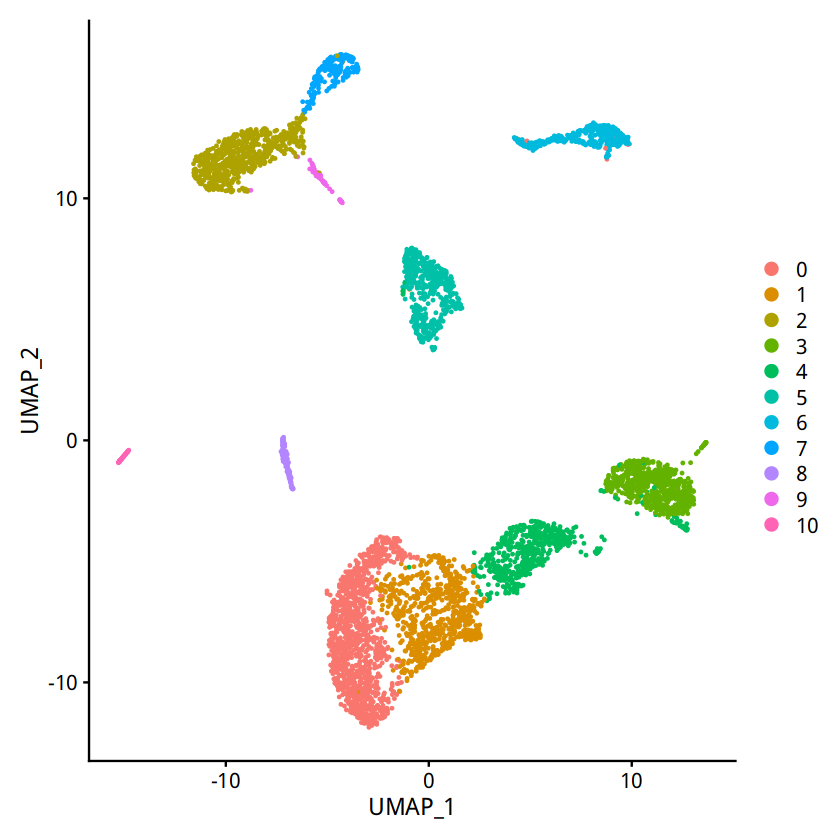

In [16]:
DimPlot(pbmc, reduction = "umap")

In [23]:
write.csv(pbmc@active.ident,file='Seurat_cluster.csv',quote=F)